<a href="https://colab.research.google.com/github/YashviP/Computer-Vision-Playlist/blob/main/OpenCV/Countour_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Contour Features
1. Moments
2. Perimeter
3.  Contour Approximation

## 1. Moments
Image moments help you to calculate some features like center of mass of the object, area of the object etc

In [ ]:

im = cv.imread('/content/bag.jpg')
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
# Find Canny edges
ret,img_th = cv.threshold(gray, 50, 255, cv.THRESH_BINARY_INV)
contours, hierarchy = cv.findContours(img_th,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE )
cnt = contours[0]
M = cv.moments(cnt)
print(M)

{'m00': 1.0, 'm10': 212.5, 'm01': 102.0, 'm20': 45156.33333333333, 'm11': 21674.916666666664, 'm02': 10404.166666666666, 'm30': 9595756.25, 'm21': 4605910.583333333, 'm12': 2210868.4166666665, 'm03': 1061259.0, 'mu20': 0.0833333333284827, 'mu11': -0.08333333333575865, 'mu02': 0.16666666666606034, 'mu30': 3.725290298461914e-09, 'mu21': 1.4260876923799515e-09, 'mu12': 4.3928594095632434e-10, 'mu03': 2.3283064365386963e-10, 'nu20': 0.0833333333284827, 'nu11': -0.08333333333575865, 'nu02': 0.16666666666606034, 'nu30': 3.725290298461914e-09, 'nu21': 1.4260876923799515e-09, 'nu12': 4.3928594095632434e-10, 'nu03': 2.3283064365386963e-10}


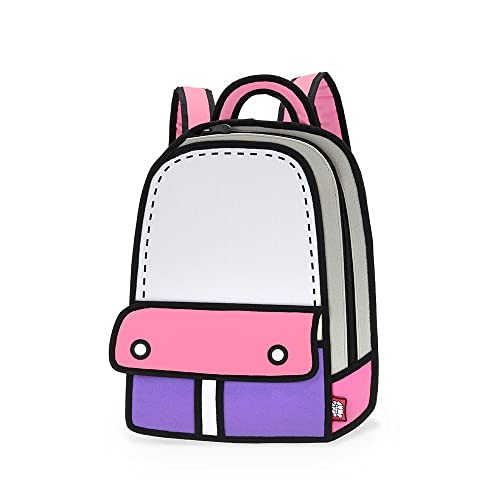

In [ ]:
cv2_imshow(im)

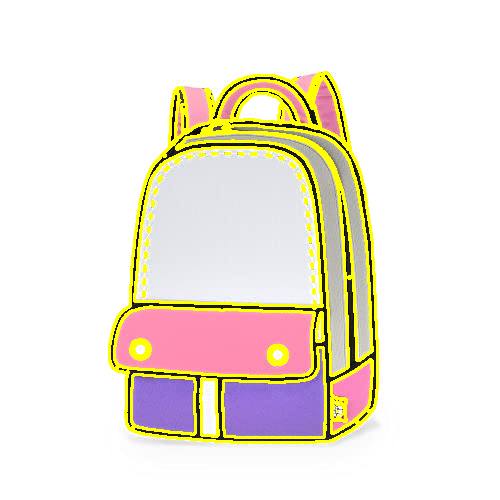

In [ ]:
_=cv.drawContours(im, contours, -1, (0, 255, 255),2)
cv2_imshow(im)

#### **1. Centroid**

```
Cx = M10 / M00  and Cy = M01 / M00
```

#### **2. Area**

```
M['m00']
```

In [ ]:
area = cv.contourArea(cnt)
area

1.0

# 2. Perimeter

In [ ]:
perimeter = cv.arcLength(cnt,True) # Second argument - whether shape is a closed contour (if passed True), or just a curve.

In [ ]:
perimeter

6.828427076339722

# 3. Contour Approximation

Ramer–Douglas–Peucker algorithm

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/3/30/Douglas-Peucker_animated.gif')

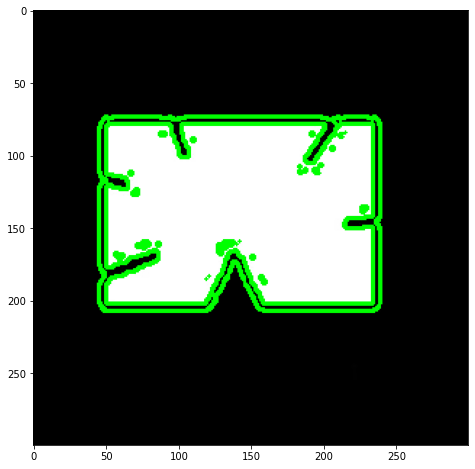

In [ ]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/ctr-appr.jpeg", 0);


thresh=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
edge = cv2.Canny(thresh, 100, 200)

contours, hierarchy= cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);


# drawing contours over original image
img_with_contours = img.copy();
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR);
cv2.drawContours(img_with_contours, contours, -1, (0,255,0), 2); 

plt.figure(figsize=(8, 8));
plt.imshow(img_with_contours[:,:,::-1])
plt.show()

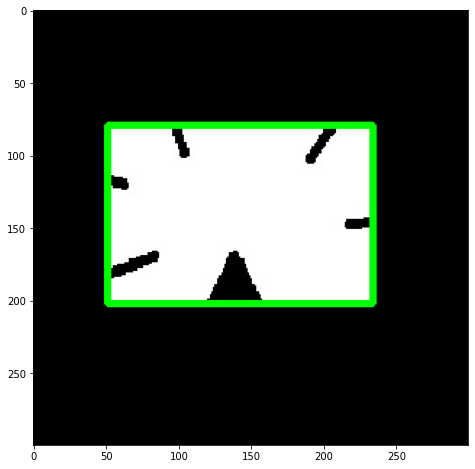

In [ ]:
cnt = contours[6]
epsilon = 0.1*cv2.arcLength(cnt,True) # maximum distance from contour to approximated contour.
approx = cv2.approxPolyDP(cnt,epsilon,True)

# drawing contours over original image
img_with_contours = img.copy()
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_with_contours, [approx], 0, (0,255,0), 3) # Talk about (0, 255, 0) colors


plt.figure(figsize=(8, 8))
plt.imshow(img_with_contours[:,:,::-1])
plt.show()